# Introduction to TensorFlow

> Logistic Regression with TensorFlow

郭耀仁

## 大綱

- 取得資料
- 建構 TensorFlow 計算圖形
- 訓練
- 隨堂練習

## 取得資料

## 簡單、作為測試目的即可

Scikit-Learn Breast Cancer 資料集

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
print(breast_cancer.feature_names)
print(breast_cancer.DESCR)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
    

In [2]:
X_arr = breast_cancer.data[:, [3]]
y_arr = breast_cancer.target
print(X_arr.shape)
print(y_arr.shape)

(569, 1)
(569,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 1)
(171, 1)
(398,)
(171,)


## 建構 TensorFlow 計算圖形

## 準備 Placeholders 供訓練時輸入 X_train、y_train

In [4]:
import tensorflow as tf

X_train_shape = X_train.shape
y_train_shape = y_train.shape
X = tf.placeholder(tf.float32, X_train_shape)
y = tf.placeholder(tf.float32, y_train_shape)

## 準備變數供訓練時尋找最適係數（Weights）與殘差項（Bias）

In [5]:
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
W = tf.Variable(tf.random_normal(W_shape))
b = tf.Variable(tf.random_normal(b_shape))
with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    print(sess.run(W))
    print(sess.run(b))

Instructions for updating:
Colocations handled automatically by placer.
[[-1.0132939]]
[-1.6896259]


## 檢查 X、W 與 b 的外觀，寫下 y_pred 的公式

In [6]:
y_logit = tf.squeeze(tf.add(tf.matmul(X, W), b))
y_one_prob = tf.sigmoid(y_logit) # Sigmoid
y_pred = tf.round(y_one_prob)    # Step Function
print(X.shape)
print(W.shape)
print(b.shape)
print(y_pred)

(398, 1)
(1, 1)
(1,)
Tensor("Round:0", shape=(398,), dtype=float32)


## `tf.squeeze()` 做了什麼事？

In [7]:
a = tf.ones((398, 1), dtype=tf.int32)
b = tf.squeeze(a)
print(a.shape)
print(b.shape)

(398, 1)
(398,)


## 寫下成本函數的公式

In [8]:
entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
loss = tf.reduce_sum(entropy)

## 宣告 Optimizer 與學習速率

In [9]:
# Adam as in adaptive moment estimation, 與基礎 Gradient Descent 不同的地方是 learning rate 會隨著梯度最自適應（adaptive）調整
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## 建構 TensorFlow 計算圖形完整程式碼

In [10]:
import tensorflow as tf

tf.reset_default_graph()
X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
learning_rate = 0.001

# placeholders
with tf.name_scope("placeholders"):
    X = tf.placeholder(tf.float32, X_train_shape)
    y = tf.placeholder(tf.float32, y_train_shape)
# weights
with tf.name_scope("weights"):
    W = tf.Variable(tf.random_normal(W_shape))
    b = tf.Variable(tf.random_normal(b_shape))
# prediction
with tf.name_scope("prediction"):
    y_logit = tf.squeeze(tf.matmul(X, W) + b)
    y_one_prob = tf.sigmoid(y_logit) # Sigmoid
    y_pred = tf.round(y_one_prob)    # Step Function
# loss
with tf.name_scope("loss"):
    entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
    loss = tf.reduce_sum(entropy)
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

## 訓練

In [11]:
n_steps = 1000
file_writer_path = "./graphs/logistic-regression"

with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(n_steps):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
        if i % 100 == 0:
            print("step {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

FailedPreconditionError: Attempting to use uninitialized value optimizer/beta2_power
	 [[node optimizer/beta2_power/read (defined at <ipython-input-10-955e0c6de1a7>:29) ]]

Caused by op 'optimizer/beta2_power/read', defined at:
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/asyncio/base_events.py", line 438, in run_forever
    self._run_once()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/asyncio/base_events.py", line 1451, in _run_once
    handle._run()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/gen.py", line 781, in inner
    self.run()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 370, in dispatch_queue
    yield self.process_one()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/gen.py", line 708, in __init__
    self.run()
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/gen.py", line 742, in run
    yielded = self.gen.send(value)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2848, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2874, in _run_cell
    return runner(coro)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3049, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3214, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-955e0c6de1a7>", line 29, in <module>
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 413, in minimize
    name=name)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 595, in apply_gradients
    self._create_slots(var_list)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/adam.py", line 131, in _create_slots
    colocate_with=first_var)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 828, in _create_non_slot_variable
    colocate_with))
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 213, in __call__
    return cls._variable_v1_call(*args, **kwargs)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 176, in _variable_v1_call
    aggregation=aggregation)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 155, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2495, in default_variable_creator
    expected_shape=expected_shape, import_scope=import_scope)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 217, in __call__
    return super(VariableMetaclass, cls).__call__(*args, **kwargs)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1395, in __init__
    constraint=constraint)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 1557, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/dispatch.py", line 180, in wrapper
    return target(*args, **kwargs)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 81, in identity
    ret = gen_array_ops.identity(input, name=name)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3890, in identity
    "Identity", input=input, name=name)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/Users/kuoyaojen/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value optimizer/beta2_power
	 [[node optimizer/beta2_power/read (defined at <ipython-input-10-955e0c6de1a7>:29) ]]


## 發生了什麼事情？

記得 `FailedPreconditionError` 在什麼時候會出現嗎？

## 檢查 Graph 上面有哪些 Variables

In [12]:
for v in tf.global_variables():
    print(v)

<tf.Variable 'weights/Variable:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'weights/Variable_1:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'optimizer/beta1_power:0' shape=() dtype=float32_ref>
<tf.Variable 'optimizer/beta2_power:0' shape=() dtype=float32_ref>
<tf.Variable 'weights/Variable/Adam:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'weights/Variable/Adam_1:0' shape=(1, 1) dtype=float32_ref>
<tf.Variable 'weights/Variable_1/Adam:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'weights/Variable_1/Adam_1:0' shape=(1,) dtype=float32_ref>


## 因為我們使用的 AdamOptimizer 中有宣告變數張量

初始化所有的變數張量！

In [13]:
n_steps = 15000
file_writer_path = "./graphs/logistic-regression"
loss_history = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 初始化所有的變數張量！
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(n_steps):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
        loss_history.append(loss_)
        if i % 500 == 0:
            print("step {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

step 0, loss: 37315.609375
step 500, loss: 305.0300598144531
step 1000, loss: 287.1162109375
step 1500, loss: 266.6401062011719
step 2000, loss: 246.0679473876953
step 2500, loss: 226.7593994140625
step 3000, loss: 209.33627319335938
step 3500, loss: 193.9803009033203
step 4000, loss: 180.64161682128906
step 4500, loss: 169.16152954101562
step 5000, loss: 159.34054565429688
step 5500, loss: 150.9737091064453
step 6000, loss: 143.86782836914062
step 6500, loss: 137.84893798828125
step 7000, loss: 132.7644500732422
step 7500, loss: 128.4824981689453
step 8000, loss: 124.89008331298828
step 8500, loss: 121.89076232910156
step 9000, loss: 119.40223693847656
step 9500, loss: 117.3541488647461
step 10000, loss: 115.68594360351562
step 10500, loss: 114.3462142944336
step 11000, loss: 113.28887939453125
step 11500, loss: 112.47245025634766
step 12000, loss: 111.86992645263672
step 12500, loss: 111.41655731201172
step 13000, loss: 111.11125183105469
step 13500, loss: 110.91412353515625
step 140

## 加入 Batch 訓練

In [14]:
import tensorflow as tf

tf.reset_default_graph()
X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
learning_rate = 0.001

# placeholders
with tf.name_scope("placeholders"):
    X = tf.placeholder(tf.float32) # 不指定外觀
    y = tf.placeholder(tf.float32) # 不指定外觀
# weights
with tf.name_scope("weights"):
    W = tf.Variable(tf.random_normal(W_shape))
    b = tf.Variable(tf.random_normal(b_shape))
# prediction
with tf.name_scope("prediction"):
    y_logit = tf.squeeze(tf.matmul(X, W) + b)
    y_one_prob = tf.sigmoid(y_logit) # Sigmoid
    y_pred = tf.round(y_one_prob)    # Step Function
# loss
with tf.name_scope("loss"):
    entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
    loss = tf.reduce_sum(entropy)
# optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [15]:
n_steps = 15000
file_writer_path = "./graphs/logistic-regression"
loss_history = []
batch_size = 50
n_obs = X_train.shape[0]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 初始化所有的變數張量！
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(n_steps):
        pos = 0
        while pos < n_obs:
            batch_X = X_train[pos:(pos + batch_size)]
            batch_y = y_train[pos:(pos + batch_size)]
            feed_dict = {
                X: batch_X,
                y: batch_y
            }
            _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
            pos += batch_size
        loss_history.append(loss_)
        if i % 500 == 0:
            print("step {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

step 0, loss: 510.95709228515625
step 500, loss: 29.44960594177246
step 1000, loss: 20.145835876464844
step 1500, loss: 18.82184410095215
step 2000, loss: 18.907733917236328
step 2500, loss: 19.107349395751953
step 3000, loss: 19.270645141601562
step 3500, loss: 19.391685485839844
step 4000, loss: 19.479679107666016
step 4500, loss: 19.54343032836914
step 5000, loss: 19.589651107788086
step 5500, loss: 19.623214721679688
step 6000, loss: 19.64761734008789
step 6500, loss: 19.665390014648438
step 7000, loss: 19.6783504486084
step 7500, loss: 19.687793731689453
step 8000, loss: 19.694686889648438
step 8500, loss: 19.699735641479492
step 9000, loss: 19.703414916992188
step 9500, loss: 19.706073760986328
step 10000, loss: 19.708106994628906
step 10500, loss: 19.7094669342041
step 11000, loss: 19.71052360534668
step 11500, loss: 19.711360931396484
step 12000, loss: 19.711898803710938
step 12500, loss: 19.71233558654785
step 13000, loss: 19.712690353393555
step 13500, loss: 19.71276092529297

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(n_steps), loss_history)
plt.title("Loss Summary")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

<Figure size 640x480 with 1 Axes>

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score

def sigmoid(x):
    ans = 1 / (1 + np.exp(-x))
    return(ans)
y_logit = (np.dot(X_test, w_final) + b_final[0]).ravel()
y_one_prob = sigmoid(y_logit)
y_pred = np.round(y_one_prob)
acc = accuracy_score(y_test, y_pred)

In [18]:
print(w_final)
print(b_final)
print(acc)

[[-0.01153078]]
[7.925975]
0.8713450292397661


## 隨堂練習

## 以 breast_cancer 建立一個 Logistic Regression Classifier：class ~ mean area + area error + worst area

In [19]:
X_arr = breast_cancer.data[:, [3, 13, 23]]
y_arr = breast_cancer.target
print(X_arr.shape)
print(y_arr.shape)

(569, 3)
(569,)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 3)
(171, 3)
(398,)
(171,)


In [21]:
import tensorflow as tf

tf.reset_default_graph()
X_train_shape = X_train.shape
y_train_shape = y_train.shape
W_shape = (X_train_shape[1], 1)
b_shape = (1,)
learning_rate = 0.001

# placeholders
with tf.name_scope("placeholders"):
    X = tf.placeholder(tf.float32, X_train_shape)
    y = tf.placeholder(tf.float32, y_train_shape)
# weights
with tf.name_scope("weights"):
    W = tf.Variable(tf.random_normal(W_shape))
    b = tf.Variable(tf.random_normal(b_shape))
# prediction
with tf.name_scope("prediction"):
    y_logit = tf.squeeze(tf.add(tf.matmul(X, W), b))
    y_one_prob = tf.sigmoid(y_logit) # Sigmoid
    y_pred = tf.round(y_one_prob)    # Step Function
# loss
with tf.name_scope("loss"):
    entropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logit, labels=y)
    loss = tf.reduce_sum(entropy)
# optimizer
with tf.name_scope("optimizer"):
    opt = tf.train.AdamOptimizer(learning_rate)
    optimizer = opt.minimize(loss)

In [22]:
n_steps = 20000
file_writer_path = "./graphs/logistic-regression"
loss_history = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # 初始化所有的變數張量！
    train_writer = tf.summary.FileWriter(file_writer_path, tf.get_default_graph())
    for i in range(n_steps):
        feed_dict = {
            X: X_train,
            y: y_train
        }
        _, loss_ = sess.run([optimizer, loss], feed_dict=feed_dict)
        loss_history.append(loss_)
        if i % 500 == 0:
            print("step {}, loss: {}".format(i, loss_))
    w_final, b_final = sess.run([W, b])

step 0, loss: 108587.8359375
step 500, loss: 4008.458740234375
step 1000, loss: 996.7466430664062
step 1500, loss: 195.0693817138672
step 2000, loss: 123.92073822021484
step 2500, loss: 117.97643280029297
step 3000, loss: 114.43448638916016
step 3500, loss: 110.66551208496094
step 4000, loss: 106.62932586669922
step 4500, loss: 102.46037292480469
step 5000, loss: 98.30888366699219
step 5500, loss: 94.30934143066406
step 6000, loss: 90.56454467773438
step 6500, loss: 87.14035034179688
step 7000, loss: 84.06866455078125
step 7500, loss: 81.3553237915039
step 8000, loss: 78.98870086669922
step 8500, loss: 76.94596099853516
step 9000, loss: 75.19992065429688
step 9500, loss: 73.7214126586914
step 10000, loss: 72.48463439941406
step 10500, loss: 71.47044372558594
step 11000, loss: 70.62886810302734
step 11500, loss: 69.9572982788086
step 12000, loss: 69.42605590820312
step 12500, loss: 69.0158462524414
step 13000, loss: 68.70576477050781
step 13500, loss: 68.48106384277344
step 14000, loss:

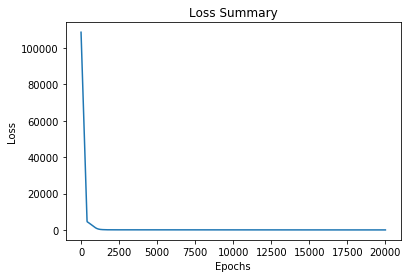

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(n_steps), loss_history)
plt.title("Loss Summary")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [24]:
import numpy as np

def sigmoid(x):
    ans = 1 / (1 + np.exp(-x))
    return(ans)
y_logit = (np.dot(X_test, w_final) + b_final[0]).ravel()
y_one_prob = sigmoid(y_logit)
y_pred = np.round(y_one_prob)
acc = accuracy_score(y_test, y_pred)

In [25]:
print(w_final)
print(b_final)
print(acc)

[[ 0.01963446]
 [-0.0374072 ]
 [-0.02477466]]
[9.209778]
0.9239766081871345
